# Task-1: Diabetes Prediction [Normal Task Phase -2]

#Diabetes Prediction dataset link on kaggle : https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
#Importing required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

In [2]:
# Creating the dataframe
df=pd.read_csv("diabetes_prediction_dataset.csv")
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Key Findings:
1. Age: The dataset contains a wide range of ages, with a higher concentration of older adults.
2. Gender: The majority of individuals in the dataset are females, followed by males and others.
3. BMI: The distribution of BMI shows that a significant portion of individuals fall into the overweight and obese categories.
4. Hypertension and Heart Disease: There are individuals with hypertension and heart disease in the dataset, which are associated with an increased risk of diabetes.
5. Smoking History: The dataset includes information on smoking history, which can be a risk factor for diabetes.
6. HbA1c Level and Blood Glucose Level: Higher levels of HbA1c and blood glucose indicate a greater risk of diabetes.¶

# EDA

In [3]:
# Check the dimensions of the dataset
df.shape

(100000, 9)

In [4]:
# Preview the first 10 rows of the dataset
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [5]:
# Preview the last 10 rows of the dataset
df.tail(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [6]:
# Use the info() function to get an overview of the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# Calculate basic statistical measures using the describe() function
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


# Data Cleaning and Handling Missing Values

In [8]:
# Identify missing values in the dataset
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
# Checking duplicate records
df.duplicated().sum()

3854

In [10]:
# Removing duplicate records
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

# Data Visualization

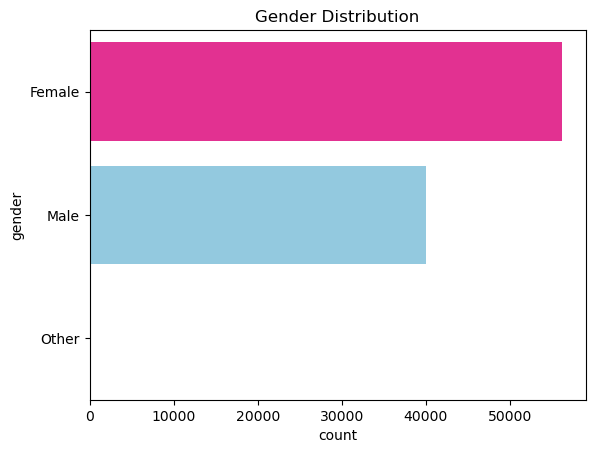

In [12]:
# Bar plots for categorical variabels
custom_palette = ["#FF1493", "#87CEEB"]
sns.countplot(y="gender", data=df, palette=custom_palette)
plt.title("Gender Distribution")
plt.show()

By the above bar plot we can say that here are mostly Females. 

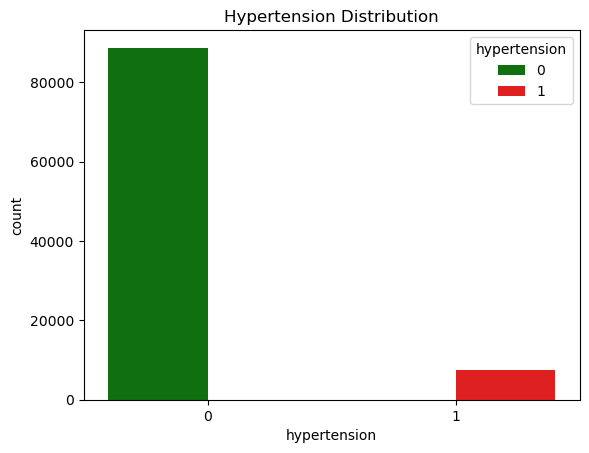

In [13]:
custom_palette = ["green", "red"]
sns.countplot(x="hypertension", data=df, hue="hypertension", palette=custom_palette)
plt.title("Hypertension Distribution")
plt.show()

Based on the above Bar Plot we can say that most people don't have high blood pressure or hypertenison.

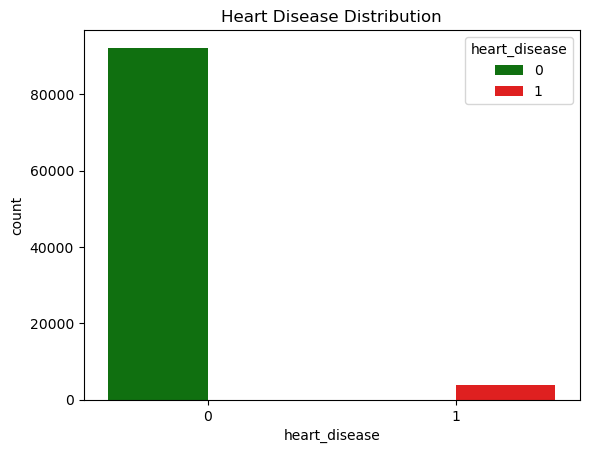

In [14]:
custom_palette = ["green", "red"]
sns.countplot(x="heart_disease", data=df, hue="heart_disease", palette=custom_palette)
plt.title("Heart Disease Distribution")
plt.show()

Based on the above Bar Plot we can say that most people don't have Heart Disease.

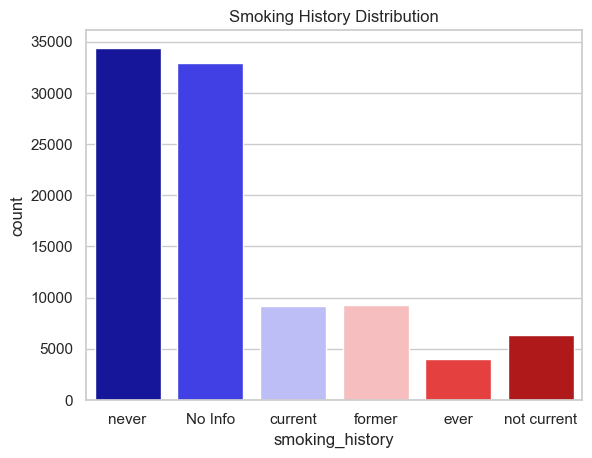

In [15]:
sns.set_theme(style="whitegrid")
sns.countplot(x="smoking_history", data=df, palette="seismic")
plt.title("Smoking History Distribution")
plt.show()

<Axes: xlabel='smoking_history', ylabel='hypertension'>

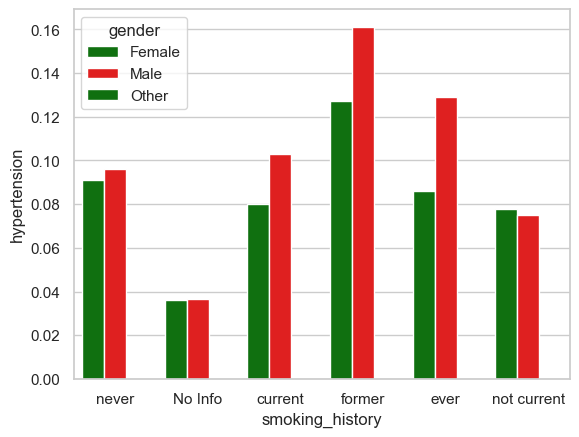

In [16]:
custom_palette = ["green", "red"]
sns.barplot(x=df['smoking_history'], y=df['hypertension'], hue=df['gender'], palette=custom_palette, errorbar=None)

<Axes: xlabel='smoking_history', ylabel='heart_disease'>

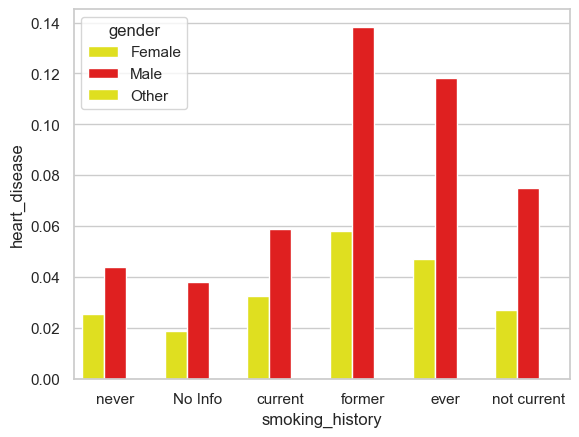

In [17]:
custom_palette = ["yellow", "red"]
sns.barplot(x=df['smoking_history'], y=df['heart_disease'], hue=df['gender'], palette=custom_palette, errorbar=None)

<Axes: xlabel='age', ylabel='bmi'>

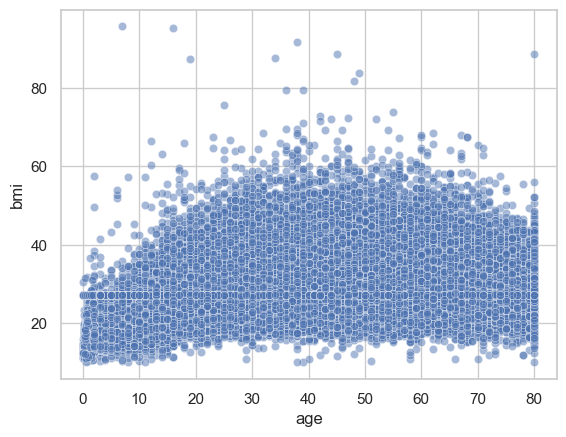

In [18]:
sns.scatterplot(x=df['age'], y=df['bmi'], alpha=0.5)

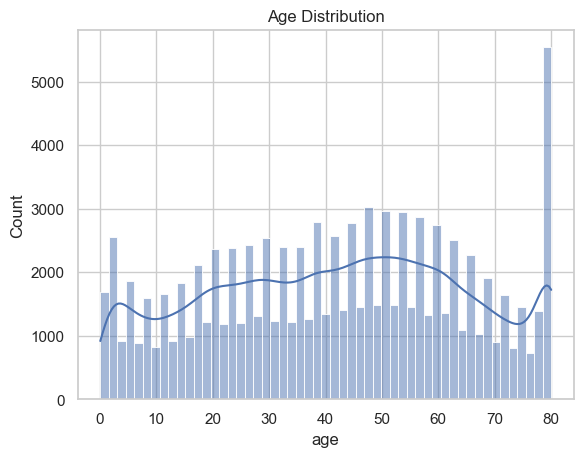

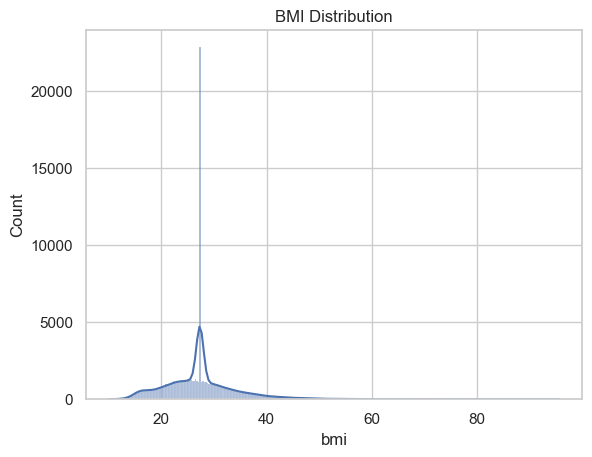

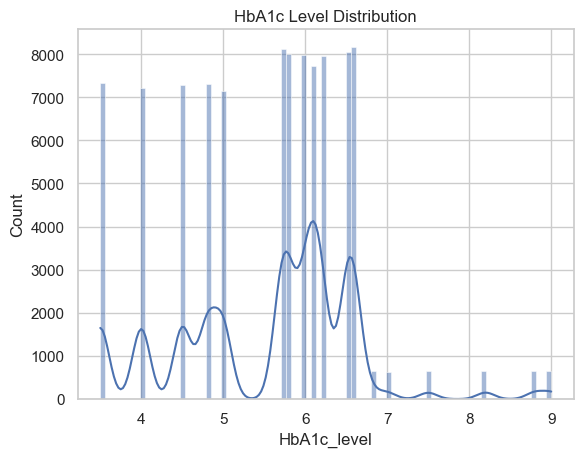

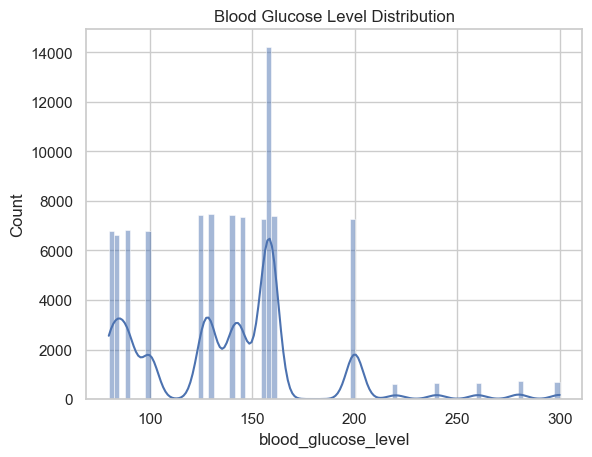

In [19]:
# Histograms for numeric variables
sns.histplot(x="age", data=df, kde=True)
plt.title("Age Distribution")
plt.show()

sns.histplot(x="bmi", data=df, kde=True)
plt.title("BMI Distribution")
plt.show()

sns.histplot(x="HbA1c_level", data=df, kde=True)
plt.title("HbA1c Level Distribution")
plt.show()

sns.histplot(x="blood_glucose_level", data=df, kde=True)
plt.title("Blood Glucose Level Distribution")
plt.show()

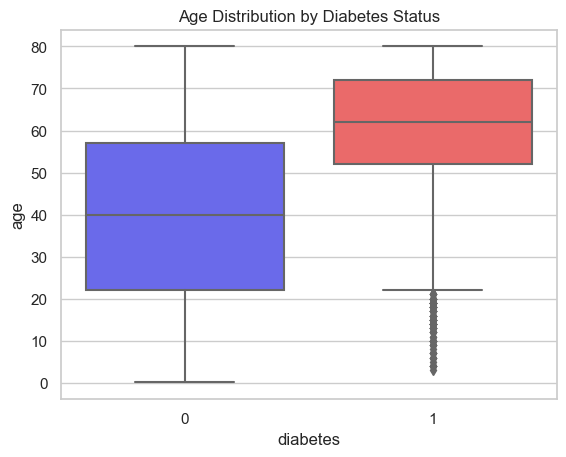

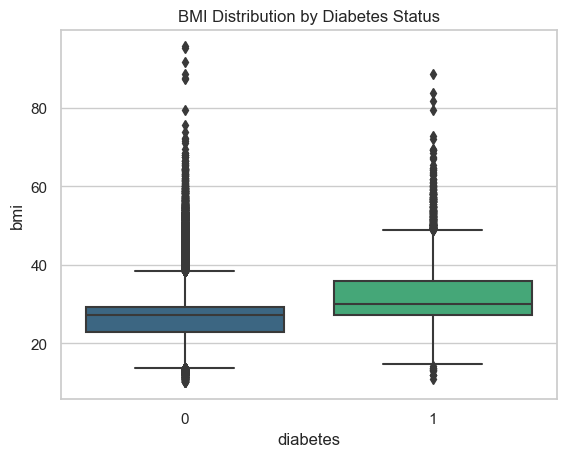

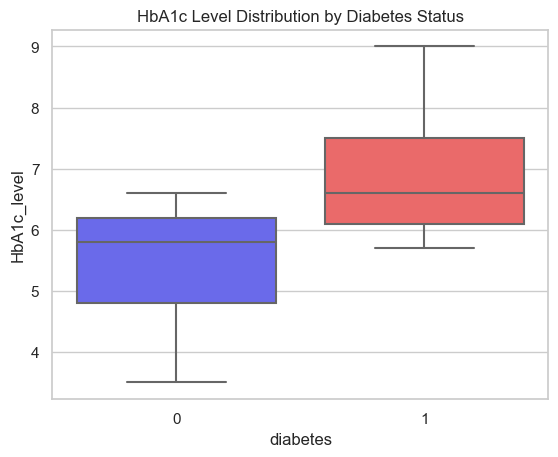

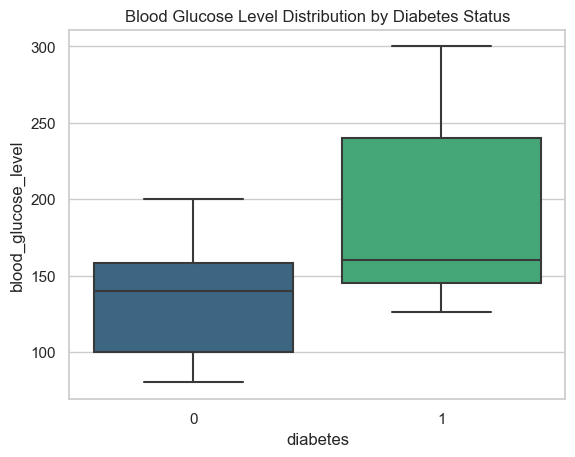

In [20]:
# Box plots for variables across different diabetes status
sns.boxplot(x="diabetes", y="age", data=df, palette='seismic')
plt.title("Age Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="bmi", data=df, palette='viridis')
plt.title("BMI Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="HbA1c_level", data=df, palette='seismic')
plt.title("HbA1c Level Distribution by Diabetes Status")
plt.show()

sns.boxplot(x="diabetes", y="blood_glucose_level", data=df, palette='viridis')
plt.title("Blood Glucose Level Distribution by Diabetes Status")
plt.show()

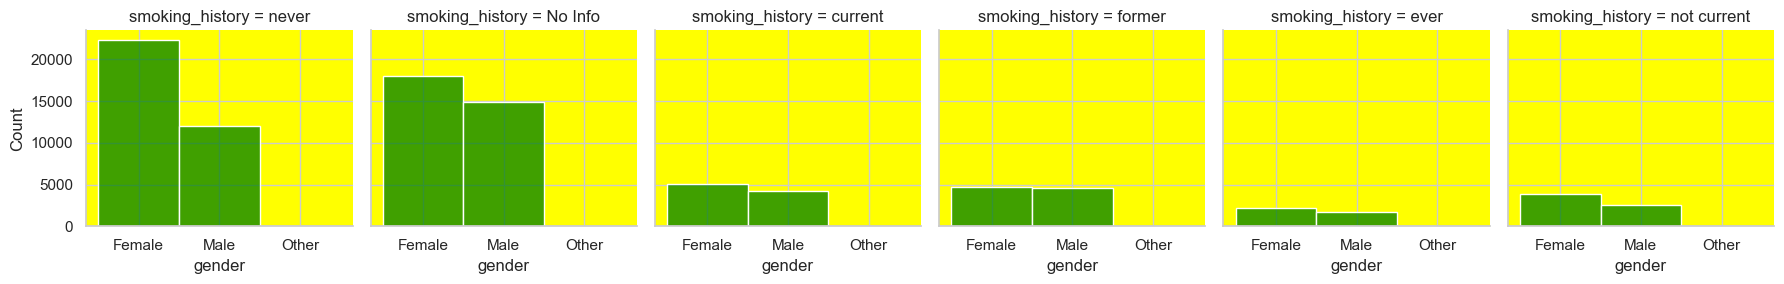

In [21]:
g = sns.FacetGrid(df, col="smoking_history")
g.map_dataframe(sns.histplot, x="gender", color='green')
g.set(facecolor='yellow')

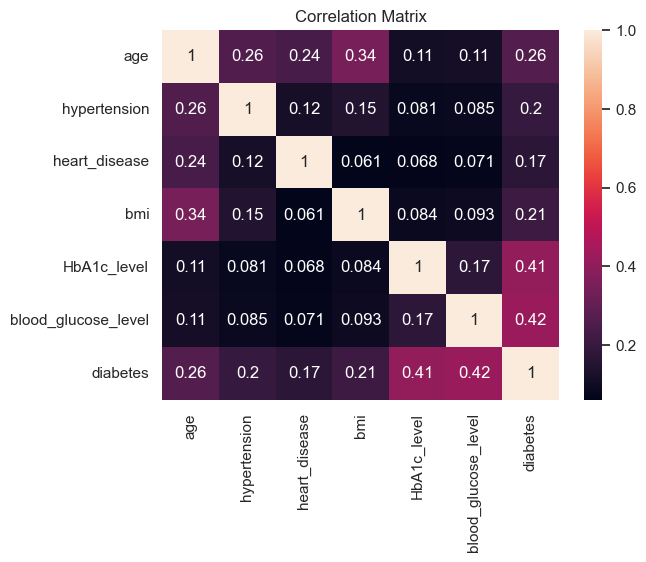

In [22]:
# Correlation matrix to visualize the correlation between variables
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

## Feature Engineering

In [23]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [25]:
#Extracting Independent and dependent Variable  
X= df.drop(['diabetes'], axis=1)  
y= df['diabetes']  

### Splitting data for training and testing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=27, test_size=0.2)

## Feature Scaling  

In [27]:
from sklearn.preprocessing import StandardScaler    
st_X = StandardScaler()    
X_train = st_X.fit_transform(X_train)    
X_test = st_X.transform(X_test)  

## Model Training

In [28]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [29]:
y_pred= classifier.predict(X_test)

In [30]:
df1=pd.DataFrame({'Actual': y_test, 'Predict': y_pred})
df1

,Actual,Predict
76973,0,0
1374,0,0
3553,0,0
93029,1,1
78886,0,0
...,...,...
66849,0,0
98774,0,0
96185,0,0
3277,1,0


In [31]:
print("Accuracy Score for Test Dataset is ",classifier.score(X_test, y_test)*100,"%")
print("Accuracy Score for Train Dataset is",classifier.score(X_train,y_train)*100,"%")

Accuracy Score for Test Dataset is  95.81903276131045 %
Accuracy Score for Train Dataset is 95.91372406261375 %


In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.04180967238689547
MSE: 0.04180967238689547
RMSE: 0.20447413622973315


In [33]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [34]:
df.max()

gender                   2.00
age                     80.00
hypertension             1.00
heart_disease            1.00
smoking_history          5.00
bmi                     95.69
HbA1c_level              9.00
blood_glucose_level    300.00
diabetes                 1.00
dtype: float64

In [35]:
df.min()

gender                  0.00
age                     0.08
hypertension            0.00
heart_disease           0.00
smoking_history         0.00
bmi                    10.01
HbA1c_level             3.50
blood_glucose_level    80.00
diabetes                0.00
dtype: float64

In [36]:
# Function to make predictions
def predict_diabetes(gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level):
    x = np.array([gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level])
    prediction = classifier.predict(x.reshape(1, -1))
    message = "Diabetic" if prediction == 1 else "Not Diabetic"
    return message

In [37]:
# Creating the Gradio interface
inputs = [
    gr.components.Number(label="Enter Gender [0 for Male,  1 for Female or 2 for Other]"),
    gr.components.Number(label="Enter Your Age :"),
    gr.components.Number(label="Enter 0 for don't have Hypertension or 1 for have Hypertension :"),
    gr.components.Number(label="Enter 0 for don't have Heart Disease or 1 for have Heart Disease :"),
    gr.components.Number(label="Smoking History: Enter 0 for Never, 1 for No information, 2 for Current, 3 for Former, 4 for Ever or 5 for Not current :"),
    gr.components.Number(label="Enter Your BMI[Body Mass Index] :"),
    gr.components.Number(label="Enter Your Hemoglibin A1C Level :"),
    gr.components.Number(label="Enter Your Blood Glucose Level :")
]

output = gr.Textbox(label="You are : ")

gr.Interface(fn=predict_diabetes, inputs=inputs, outputs=output, title="Diabetes Predictor").launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://fc13fff602d80c7040.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Conclusion
=> This diabetes prediction model will predict the outcome as Diabetic or Not Diabetic based on factors gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level.

=> This multiple linear regression model is bulid using the LogisticRegressor Machine Learning Model algorithm.

=> The model is predicting fine with an accuracy of 95%.

=> Also, This model has Gradio User interface to make it User-Friendly.